In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
# Reading csv file

df_train =  pd.read_csv(r"../data/train.csv")
df_train.head(3)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0


In [3]:
df_train.shape

(26570, 26)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [5]:
# Target Column: Failure
# This imbalance classification problem
print(df_train.failure.value_counts()/len(df_train))

0    0.787392
1    0.212608
Name: failure, dtype: float64


In [6]:
# check for number of missing values for each feature

df_train.isnull().sum().sort_values(ascending = False)

measurement_17    2284
measurement_16    2110
measurement_15    2009
measurement_14    1874
measurement_13    1774
measurement_12    1601
measurement_11    1468
measurement_10    1300
measurement_9     1227
measurement_8     1048
measurement_7      937
measurement_6      796
measurement_5      676
measurement_4      538
measurement_3      381
loading            250
id                   0
product_code         0
measurement_2        0
measurement_1        0
measurement_0        0
attribute_3          0
attribute_2          0
attribute_1          0
attribute_0          0
failure              0
dtype: int64

In [7]:
# Categorical columns in the training data

object_cols = [col for col in df_train.columns if df_train[col].dtype=='object']
print('Categoricaal columns are:\n',object_cols)

Categoricaal columns are:
 ['product_code', 'attribute_0', 'attribute_1']


In [8]:
df_train['product_code'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [9]:
df_train['attribute_0'].unique()

array(['material_7', 'material_5'], dtype=object)

In [10]:
df_train['attribute_1'].unique()

array(['material_8', 'material_5', 'material_6'], dtype=object)

<AxesSubplot:>

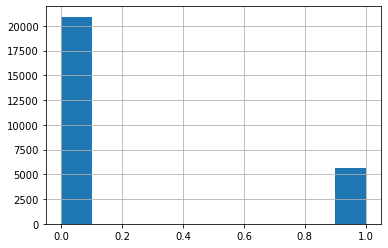

In [11]:
df_train.failure.hist()

### Splitting train dataset into kfold stratified

In [12]:
# we create a new column called kfold and fill it with -1
df_train['kfold'] = -1

In [13]:
df_train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,kfold
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0,-1
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0,-1
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0,-1
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0,-1
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0,-1


In [14]:
# Selecting the target
y = df_train.failure.values

In [15]:
# initiate the kfold class from model_selection module
from sklearn.model_selection import StratifiedKFold
kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies,valid_indicies) in enumerate(kf.split(X=df_train,y=y)):
    df_train.loc[valid_indicies,'kfold'] = fold

In [16]:
df_train.kfold.value_counts()

0    5314
4    5314
3    5314
2    5314
1    5314
Name: kfold, dtype: int64

In [17]:
df_train.to_csv("train_fold.csv",index=False)